In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from RAVEN.pe.mac_taylor_utils import *
import matplotlib.pyplot as plt

# test MAC_Taylor

In [3]:
a = torch.arange(0, 1, 0.001).cuda()

precise = torch.exp(a).cuda()

point = 0.5
scale = torch.exp(torch.tensor([point])).cuda()
var = a - point

coeff = [1/1, 1/1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040, 1/40320, 1/362880]

coeff = coeff[0:8]
print(coeff)

approximate = MAC_Taylor(scale, 
                         coeff, 
                         var, 
                         fxp=True, 
                         intwidth=7, 
                         fracwidth=8, 
                         rounding_coeff="round", 
                         rounding_var="floor", 
                         keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984]
min error rate: tensor(-0.0118, device='cuda:0')
max error rate: tensor(-0.0001, device='cuda:0')
avg error rate: tensor(-0.0053, device='cuda:0')
rms error rate: tensor(0.0056, device='cuda:0')


# point search test

1. test exp with gaussian input

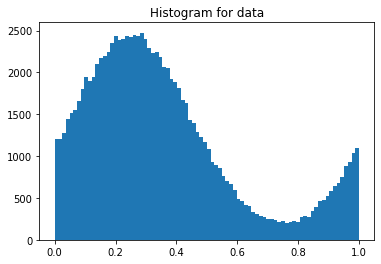

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2412641', '-0.0944120', '-0.0454613']
max error: ['0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.0554060', '-0.0253011', '-0.0205005']
rms error: ['0.0862493', '0.0344736', '0.0248096']

gaussian data mu= 0.25 Taylor expansion point= 0.1
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2657395', '-0.1433627', '-0.1250000']
max error: ['-0.0623470', '-0.0623470', '-0.0623470']
avg error: ['-0.1114978', '-0.0945900', '-0.0909877']
rms error: ['0.1238782', '0.0976343', '0.0932528']

gaussian data mu= 0.25 Taylor expansion point= 0.2
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2183837', '-0.1453258', '-0.1453258']
max error: ['-0.0751740', '-0.0751740', '-0.0751740']
avg error: ['-0.1191153', '-0.1094214', '-0.1082497']
rms error: ['0.1245937', '0.1111455', '0.1097546']

gaussian data mu= 0.25 Taylor expansion point= 0.3
eff 

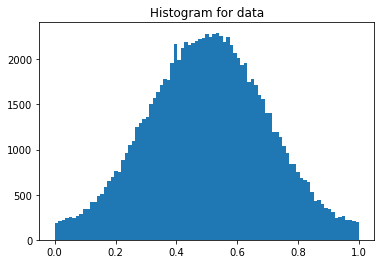

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2412641', '-0.0944120', '-0.0454613']
max error: ['0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.0877819', '-0.0316361', '-0.0254155']
rms error: ['0.1036471', '0.0370016', '0.0276448']

gaussian data mu= 0.5 Taylor expansion point= 0.1
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2657395', '-0.1433627', '-0.1250000']
max error: ['-0.0623470', '-0.0623470', '-0.0623470']
avg error: ['-0.1293956', '-0.0998330', '-0.0979733']
rms error: ['0.1374020', '0.1014214', '0.0992355']

gaussian data mu= 0.5 Taylor expansion point= 0.2
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2183837', '-0.1453258', '-0.1453258']
max error: ['-0.0751740', '-0.0751740', '-0.0751740']
avg error: ['-0.1248836', '-0.1117022', '-0.1114061']
rms error: ['0.1289188', '0.1133939', '0.1130509']

gaussian data mu= 0.5 Taylor expansion point= 0.3
eff coef

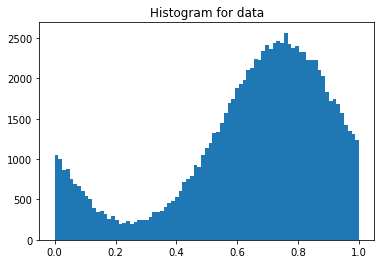

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2412641', '-0.0944120', '-0.0454613']
max error: ['0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.1356792', '-0.0466677', '-0.0271325']
rms error: ['0.1521659', '0.0538776', '0.0293829']

gaussian data mu= 0.75 Taylor expansion point= 0.1
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2657395', '-0.1433627', '-0.1250000']
max error: ['-0.0623470', '-0.0623470', '-0.0623470']
avg error: ['-0.1752806', '-0.1136313', '-0.1046881']
rms error: ['0.1831162', '0.1150827', '0.1056192']

gaussian data mu= 0.75 Taylor expansion point= 0.2
eff coeff: ['1.0000000', '1.0000000', '0.5000000']
min error: ['-0.2183837', '-0.1453258', '-0.1453258']
max error: ['-0.0751740', '-0.0751740', '-0.0751740']
avg error: ['-0.1566984', '-0.1178479', '-0.1161337']
rms error: ['0.1612618', '0.1188377', '0.1169309']

gaussian data mu= 0.75 Taylor expansion point= 0.3
eff 

In [12]:
point_search(func="exp", uniform=False, fxp=True, intwidth=7, fracwidth=4, valid=True, rounding_coeff="round", rounding_var="floor")

2. test div with gaussian input

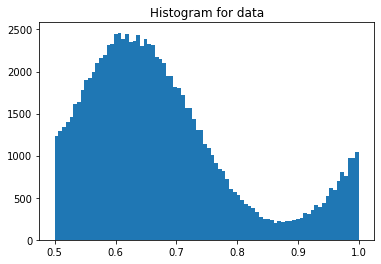

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.1205657', '-0.0482213', '-0.0206489', '-0.0095050', '-0.0052561', '-0.0033791', '-0.0026553', '-0.0024007']
rms error: ['0.1380374', '0.0586730', '0.0263249', '0.0124365', '0.0065646', '0.0038994', '0.0028877', '0.0025561']



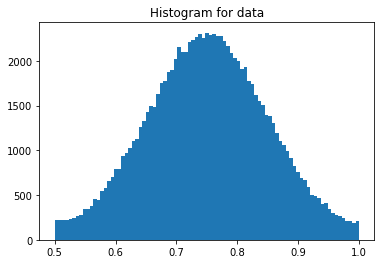

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.0728982', '-0.0244896', '-0.0096235', '-0.0045778', '-0.0031184', '-0.0025809', '-0.0024219', '-0.0023768']
rms error: ['0.0889522', '0.0336540', '0.0141535', '0.0065662', '0.0038455', '0.0028628', '0.0026039', '0.0025419']



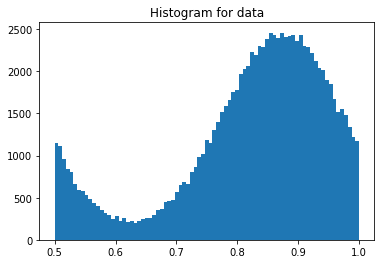

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.0481103', '-0.0175984', '-0.0079888', '-0.0044687', '-0.0031404', '-0.0025276', '-0.0022487', '-0.0021098']
rms error: ['0.0795632', '0.0348236', '0.0163953', '0.0082150', '0.0046281', '0.0030903', '0.0025386', '0.0023387']



In [5]:
point_search(func="div", uniform=False, fxp=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

3. test log with gaussian input

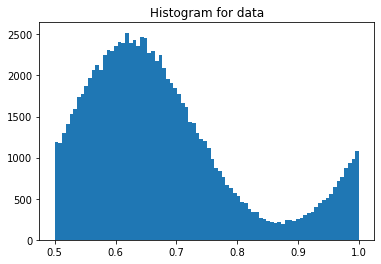

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000000', '10.6666667', '18.2857143']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-1.6842862', '0.9634159', '-0.6862090', '0.4993668', '-0.4076913', '0.3158146', '-0.2872894', '0.2301488']
rms error: ['7.9225206', '4.8400154', '3.5206745', '2.6892583', '2.1873512', '1.7770164', '1.5820357', '1.3647244']

gaussian data mu= 0.625 Taylor expansion point= 0.55
eff coeff: ['0.5978370', '1.8181818', '1.6528926', '2.0035061', '2.7320538', '3.9738965', '6.0210553', '9.3834627']
min error: ['-56.8905525', '-0.0162468', '-18.9648209', '-0.0216972', '-8.9843645', '-0.0346371', '-4.9921823', '-0.0537138']
max error: ['-0.0097406', '27.9433212', '-0.0092

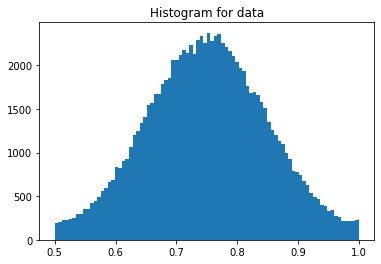

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000000', '10.6666667', '18.2857143']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-0.9015426', '0.4381427', '-0.2827331', '0.1799358', '-0.1432516', '0.0974938', '-0.0929057', '0.0620622']
rms error: ['3.8979495', '2.3592863', '1.7084804', '1.2988646', '1.0550379', '0.8546371', '0.7605998', '0.6541688']

gaussian data mu= 0.75 Taylor expansion point= 0.55
eff coeff: ['0.5978370', '1.8181818', '1.6528926', '2.0035061', '2.7320538', '3.9738965', '6.0210553', '9.3834627']
min error: ['-56.8905525', '-0.0162468', '-18.9648209', '-0.0216972', '-8.9843645', '-0.0346371', '-4.9921823', '-0.0537138']
max error: ['-0.0097406', '27.9433212', '-0.009247

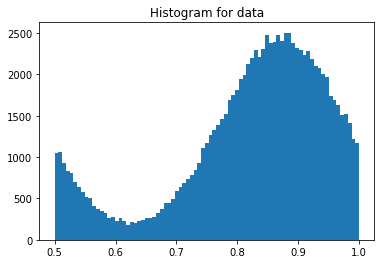

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000000', '10.6666667', '18.2857143']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-3.0109851', '1.6743062', '-1.1493869', '0.8078020', '-0.6399664', '0.4822444', '-0.4292818', '0.3302896']
rms error: ['8.6176291', '5.2327704', '3.7940831', '2.8837965', '2.3428433', '1.8965026', '1.6879301', '1.4480587']

gaussian data mu= 0.875 Taylor expansion point= 0.55
eff coeff: ['0.5978370', '1.8181818', '1.6528926', '2.0035061', '2.7320538', '3.9738965', '6.0210553', '9.3834627']
min error: ['-56.8905525', '-0.0162468', '-18.9648209', '-0.0216972', '-8.9843645', '-0.0346371', '-4.9921823', '-0.0537138']
max error: ['-0.0097406', '27.9433212', '-0.0092

In [2]:
point_search(func="log", uniform=False, fxp=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

4. test exp with uniform input

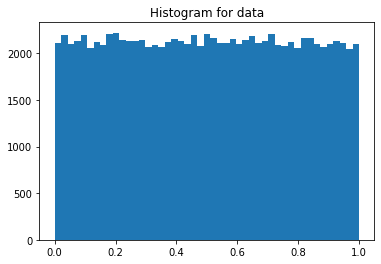

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.2628040', '-0.0810297', '-0.0209493', '-0.0070026', '-0.0056889']
max error: ['0.0000000', '0.0000000', '0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.1026920', '-0.0243777', '-0.0060919', '-0.0027039', '-0.0024147']
rms error: ['0.1310674', '0.0339142', '0.0080836', '0.0030783', '0.0026777']

gaussian data mu= 0.5 Taylor expansion point= 0.1
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.2296230', '-0.0694885', '-0.0209493', '-0.0117177', '-0.0117177']
max error: ['-0.0048213', '-0.0048213', '-0.0048213', '-0.0048213', '-0.0048213']
avg error: ['-0.0837377', '-0.0232202', '-0.0104796', '-0.0083480', '-0.0081888']
rms error: ['0.1092406', '0.0292356', '0.0110539', '0.0084496', '0.0082775']

gaussian data mu= 0.5 Taylor expansion point= 0.2
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0

In [7]:
point_search(func="exp", uniform=True, fxp=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

5. test div with uniform input

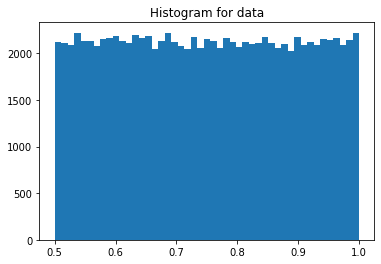

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.0845489', '-0.0330588', '-0.0144093', '-0.0070365', '-0.0042240', '-0.0029697', '-0.0024575', '-0.0022492']
rms error: ['0.1131051', '0.0485819', '0.0221476', '0.0106690', '0.0057466', '0.0035516', '0.0027316', '0.0024480']



In [8]:
point_search(func="div", uniform=True, fxp=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

6. test log with uniform input

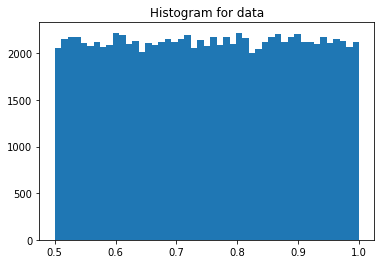

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000000', '10.6666667', '18.2857143']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-2.4568667', '1.3858631', '-0.9669906', '0.6909208', '-0.5542439', '0.4235945', '-0.3803546', '0.2989674']
rms error: ['8.5900126', '5.2326059', '3.8006773', '2.8960631', '2.3539183', '1.9090085', '1.6996061', '1.4622828']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036', '1.6000000', '1.2800000', '1.3653333', '1.6384000', '2.0971520']
min error: ['-32.9374580', '-0.0092478', '-5.9902282', '-0.0152654', '-1.0000000', '-0.0375863']
max error: ['-0.0012017', '11.9745932', '0.0000033', '1.9941367', '0.0013022', '0.0084284']
avg error: ['-

In [9]:
point_search(func="log", uniform=True, fxp=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

7. test floating point exp

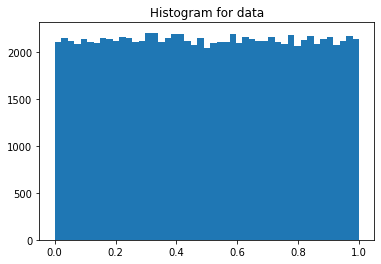

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667', '0.0083333', '0.0013889', '0.0001984']
min error: ['-0.2628040', '-0.0795842', '-0.0187495', '-0.0036002', '-0.0005822', '-0.0000812', '-0.0000099', '-0.0000011']
max error: ['0.0000000', '0.0000000', '0.0000000', '0.0000001', '0.0000001', '0.0000001', '0.0000002', '0.0000002']
avg error: ['-0.1030458', '-0.0231591', '-0.0043082', '-0.0006814', '-0.0000935', '-0.0000113', '-0.0000012', '-0.0000001']
rms error: ['0.1314733', '0.0332134', '0.0068238', '0.0011751', '0.0001737', '0.0000225', '0.0000026', '0.0000003']

gaussian data mu= 0.5 Taylor expansion point= 0.1
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667', '0.0083333', '0.0013889', '0.0001984']
min error: ['-0.2260886', '-0.0622151', '-0.0132665', '-0.0023009', '-0.0003357', '-0.0000422', '-0.0000046', '-0.0000005']
max error: ['-0.0000013', '0.0001796', '0.0000001', '0.0000001'

In [10]:
point_search(func="exp", uniform=True, fxp=False, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")